In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import random

# Import data

In [2]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['id'])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2
299,68,1,4,144,193,1,0,141,0,3.4,2
300,57,1,4,130,131,0,0,115,1,1.2,2
301,57,0,2,130,236,0,2,174,0,0.0,2


## Data info

- **age** : Age of patient
- **sex** : Gender of patient (0 = female, 1 = male)
- **cp** : Chest pain type (0 = typical angina, 1 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- **trestbps** : Resting blood pressure (in mm Hg on admission to the hospital)
- **chol** : Serum cholesterol in mg/dl
- **fpb** : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg** : Resting electrocardiographic results (0 = normal, 1 = having ST-T, 2 = hypertrophy)
- **thalach** : Maximum heart rate achieved
- **exang** : Exercise induced angina (1 = yes; 0 = no)
- **oldpeak** : ST depression induced by exercise relative to rest
- **slope** : The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

In [3]:
# change slope order to: downslope(-1), flat(0), upslope(1)
data['slope'] = data['slope'].replace([1, 2, 3], [1, 0, -1])

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.399340
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,-1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


# Visualize data

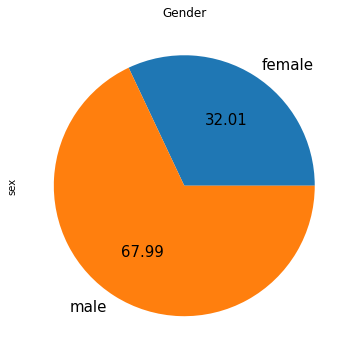

In [5]:
data['sex'].value_counts(sort=False).plot.pie(
    labels=['female', 'male'], figsize=(6, 6), autopct="%.2f", fontsize=15, title='Gender'
);

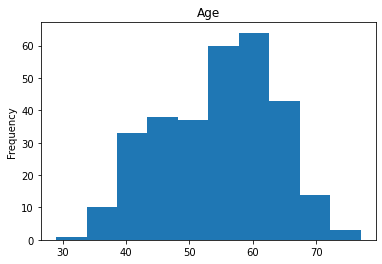

In [6]:
data['age'].plot.hist(title='Age');

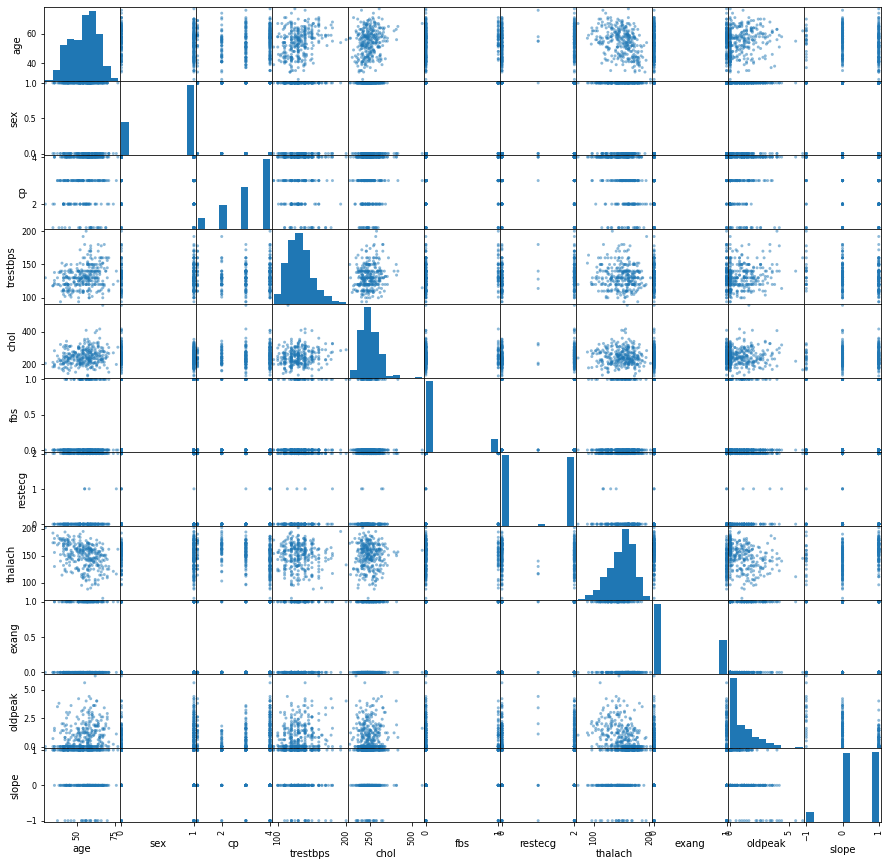

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(15, 15));

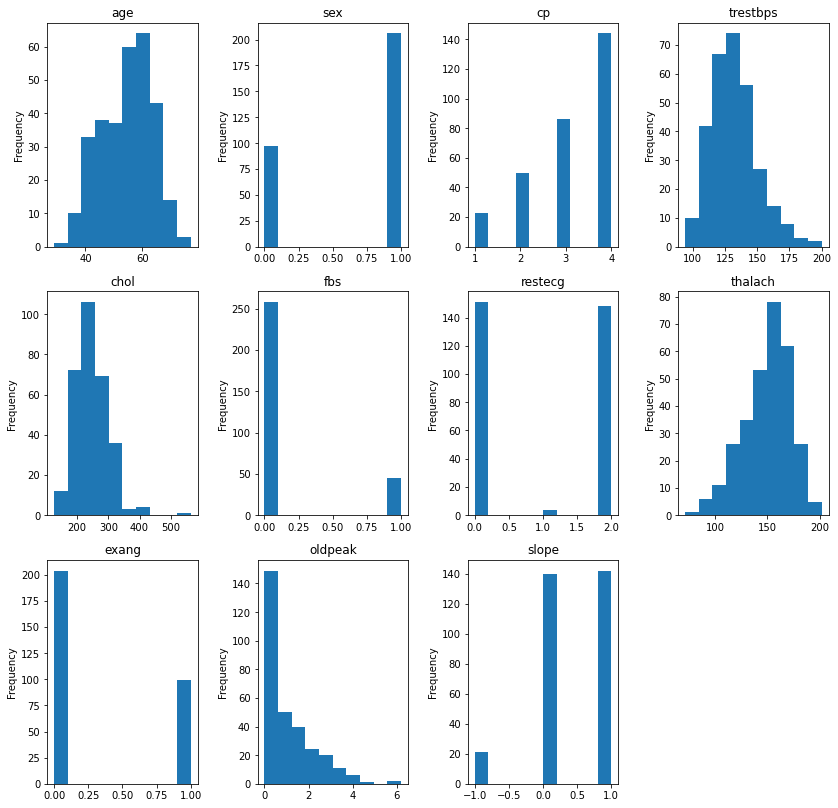

In [8]:
n, m = 3, 4
fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(14, 14))
fig.delaxes(axes[n-1][m-1])
plt.subplots_adjust(wspace=0.4, hspace=0.2)

for i, c in enumerate(data.columns):
    data[c].plot.hist(ax=axes[i // m, i % m], title=c)

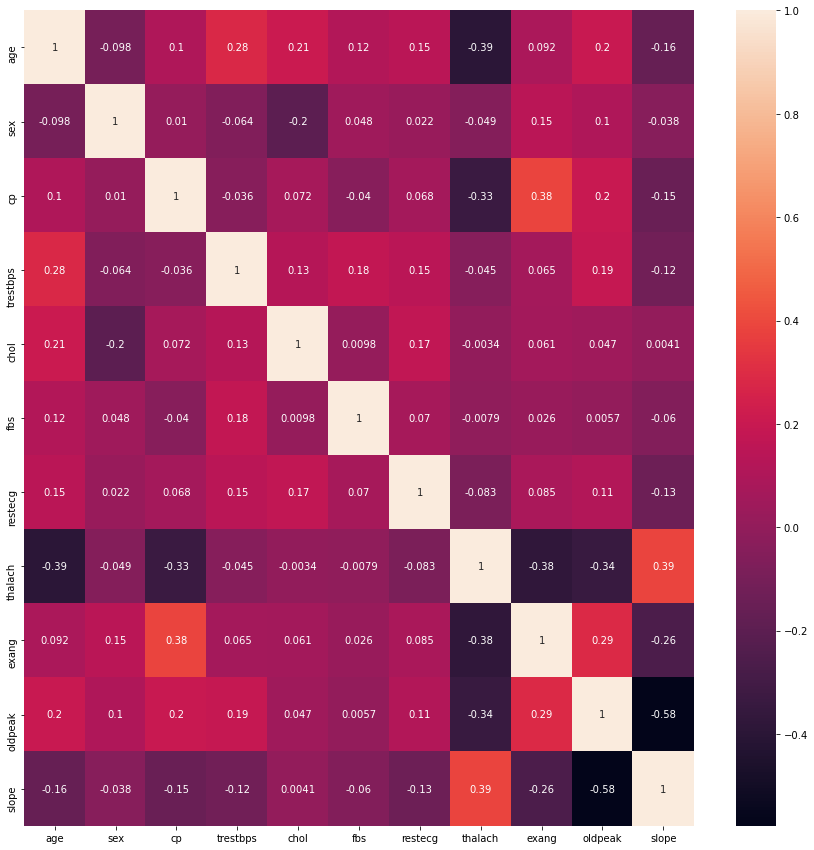

In [9]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(data.corr(),annot=True, ax=ax);

# Standardizing data

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [11]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']
data_std = data.copy()
data_std[numerical] = scaler.fit_transform(data[numerical])

In [12]:
np.set_printoptions(precision=2, suppress=True)
print("Mean:", scaler.mean_)
print("Variance:", scaler.var_)
data_std

Mean: [ 54.44 131.69 246.69 149.61   1.04   0.4 ]
Variance: [  81.43  308.73 2672.    521.54    1.34    0.38]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,-2.274579
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,-0.649113
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,-0.649113
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,-2.274579
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,0.976352
...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,1,-1.234430,0.334813,0,0,-0.770990,0,0.138373,-0.649113
299,1.502821,1,4,0.700612,-1.038723,1,0,-0.376896,0,2.036303,-0.649113
300,0.283813,1,4,-0.096170,-2.238149,0,0,-1.515388,1,0.138373,-0.649113
301,0.283813,0,2,-0.096170,-0.206864,0,2,1.068113,0,-0.896862,-0.649113


Mean: -1.5389230044309102e-17
Variance: 1.003311258278146


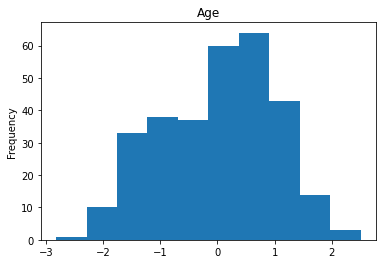

In [13]:
data_std['age'].plot.hist(title='Age');
print("Mean:", data_std['age'].mean())
print("Variance:", data_std['age'].var())

# Removing outliers

In [14]:
from sklearn.covariance import EllipticEnvelope
outlier_detector = EllipticEnvelope(contamination=.05)
outlier_detector.fit(data_std[numerical])
outliers = outlier_detector.predict(data_std[numerical])
print('Removing', (outliers == -1).sum(), 'outliers:')
#data_std[outliers == -1]

Removing 16 outliers:


In [15]:
#data_out = data_std[outliers == 1]
data_out = data_std

# One-hot encoding

In [16]:
data_hot = data_out.copy()

In [17]:
# Chest pain
one_hot = pd.get_dummies(data_hot['cp'])
one_hot.columns = ['c_typical', 'c_atypical', 'c_nonang', 'c_asymp']
data_hot = pd.concat([data_hot, one_hot], axis=1)
data_hot = data_hot.drop('cp', axis=1)
#data_hot

In [18]:
# Resting ECG
one_hot = pd.get_dummies(data_hot['restecg'])
one_hot.columns = ['r_normal', 'r_STT', 'r_hyper']
data_hot = pd.concat([data_hot, one_hot], axis=1)
data_hot = data_hot.drop('restecg', axis=1)
#data_hot

In [19]:
data_hot

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,c_typical,c_atypical,c_nonang,c_asymp,r_normal,r_STT,r_hyper
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,-2.274579,1,0,0,0,0,0,1
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,-0.649113,0,0,0,1,0,0,1
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,-0.649113,0,0,0,1,0,0,1
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,-2.274579,0,0,1,0,1,0,0
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.976352,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,-1.234430,0.334813,0,-0.770990,0,0.138373,-0.649113,1,0,0,0,1,0,0
299,1.502821,1,0.700612,-1.038723,1,-0.376896,0,2.036303,-0.649113,0,0,0,1,1,0,0
300,0.283813,1,-0.096170,-2.238149,0,-1.515388,1,0.138373,-0.649113,0,0,0,1,1,0,0
301,0.283813,0,-0.096170,-0.206864,0,1.068113,0,-0.896862,-0.649113,0,1,0,0,0,0,1


# Feature Selection

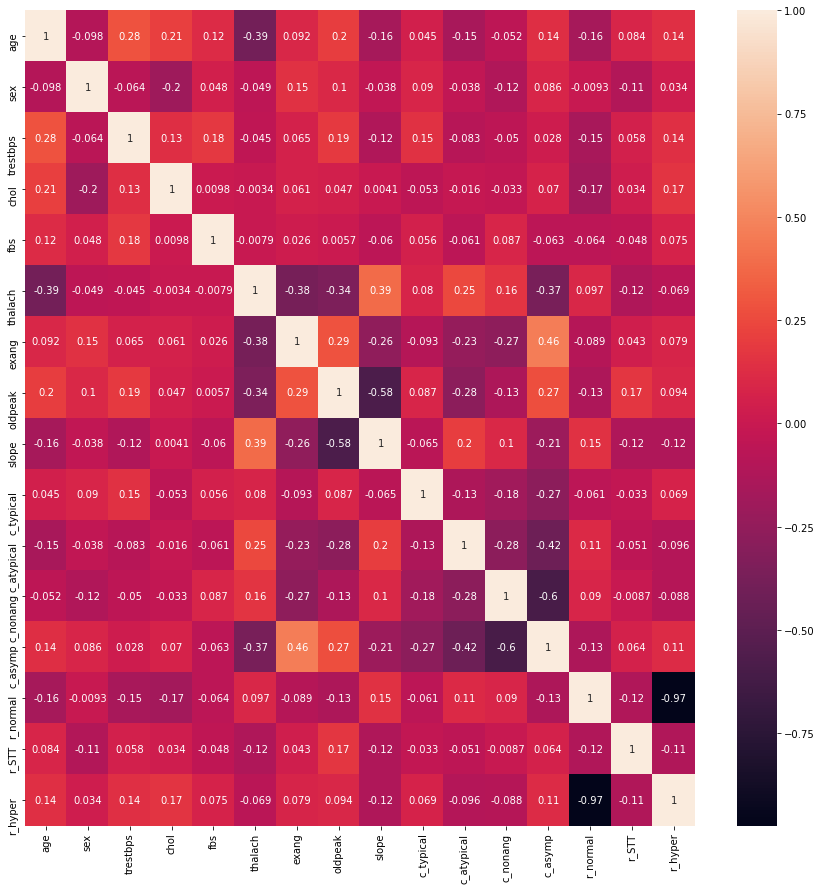

In [20]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(data_hot.corr(),annot=True, ax=ax);

In [21]:
# Remove check pain 'r_normal'
print("Resting ECG results (normal and hyper) correlation:", data_hot.corr()['r_normal']['r_hyper'])
data_clear = data_hot.drop(['r_normal'], axis=1)

Resting ECG results (normal and hyper) correlation: -0.9739388461608474


In [22]:
data_clear

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,c_typical,c_atypical,c_nonang,c_asymp,r_STT,r_hyper
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,-2.274579,1,0,0,0,0,1
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,-0.649113,0,0,0,1,0,1
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,-0.649113,0,0,0,1,0,1
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,-2.274579,0,0,1,0,0,0
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.976352,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,-1.234430,0.334813,0,-0.770990,0,0.138373,-0.649113,1,0,0,0,0,0
299,1.502821,1,0.700612,-1.038723,1,-0.376896,0,2.036303,-0.649113,0,0,0,1,0,0
300,0.283813,1,-0.096170,-2.238149,0,-1.515388,1,0.138373,-0.649113,0,0,0,1,0,0
301,0.283813,0,-0.096170,-0.206864,0,1.068113,0,-0.896862,-0.649113,0,1,0,0,0,1


# K-Means

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import random

def plot3D(a, colors):
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.scatter(a[0], a[1], a[2], s=20, c=colors, cmap='Set1')
    ax.set_xlabel('0 Label')
    ax.set_ylabel('1 Label')
    ax.set_zlabel('2 Label')

    #ax.view_init(0, -90)

    plt.show()

### Elbow Method

In [24]:
%matplotlib inline

In [25]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_clear)
    sse.append(kmeans.inertia_)

In [26]:
kmeans.inertia_

1146.8449437383263

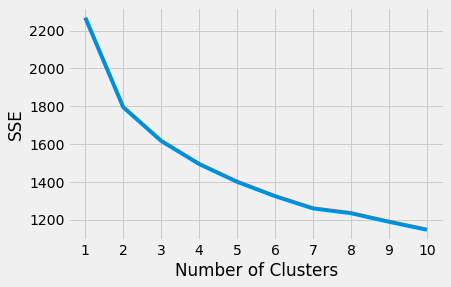

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [29]:
cluster = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
kmeans = cluster.fit(data_clear)
print(pd.DataFrame(kmeans.labels_).value_counts(sort=False))
kmeans.labels_

0     98
1    105
2    100
dtype: int64


array([2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2,

In [30]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.63,  0.57,  0.47,  0.32,  0.21,  0.21,  0.26, -0.42,  0.51,
         0.1 ,  0.19,  0.31,  0.4 , -0.  ,  0.56],
       [-1.  ,  0.72, -0.54, -0.28,  0.09,  0.63,  0.15, -0.52,  0.39,
         0.07,  0.28,  0.37,  0.29, -0.  ,  0.34],
       [ 0.42,  0.74,  0.1 , -0.02,  0.15, -0.87,  0.58,  0.96, -0.91,
         0.06,  0.02,  0.17,  0.75,  0.04,  0.57]])

In [31]:
kmeans.score(data_clear)

-1616.482218934375

In [32]:
kmeans.n_iter_

15

### Silhouette coefficient

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_clear)
    score = silhouette_score(data_clear, kmeans.labels_)
    silhouette_coefficients.append(score)

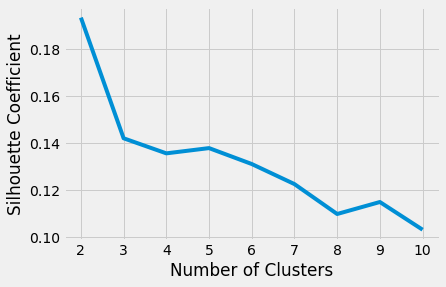

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [36]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [37]:
cluster = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
kmeans = cluster.fit(data_clear)
print(pd.DataFrame(kmeans.labels_).value_counts(sort=False))
kmeans.labels_

0     98
1    105
2    100
dtype: int64


array([2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2,

In [38]:
from sklearn.decomposition import PCA

In [39]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=3, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(data_clear)
# Show results
print("Original number of features:", data_clear.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 15
Reduced number of features: 3


In [40]:
a=pd.DataFrame(features_pca)
a

,0,1,2
0,1.443679,-0.291967,1.262823
1,1.763016,1.037868,-0.363450
2,1.317188,-0.605920,-0.907820
3,0.304436,-1.651802,2.779774
4,-1.083955,-0.556806,1.089417
...,...,...,...
298,-0.022963,-1.100034,-0.644328
299,1.470643,-0.417945,0.696341
300,0.712470,-1.726191,-0.498620
301,-0.474311,0.240009,0.367217


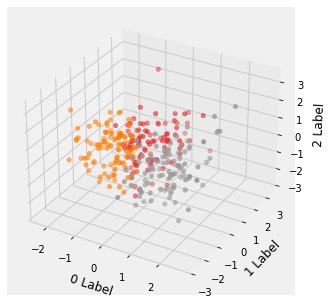

In [93]:
#%matplotlib notebook
plot3D(a, kmeans.labels_ )

In [92]:
%matplotlib inline

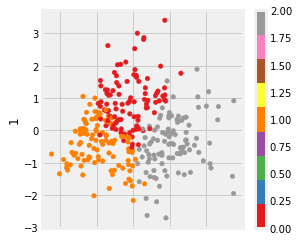

In [43]:
a.plot.scatter(x=0, y=1, c=kmeans.labels_, figsize=(4, 4), colormap='Set1', s=20);

In [44]:
data_clear

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,c_typical,c_atypical,c_nonang,c_asymp,r_STT,r_hyper
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,-2.274579,1,0,0,0,0,1
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,-0.649113,0,0,0,1,0,1
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,-0.649113,0,0,0,1,0,1
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,-2.274579,0,0,1,0,0,0
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.976352,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,-1.234430,0.334813,0,-0.770990,0,0.138373,-0.649113,1,0,0,0,0,0
299,1.502821,1,0.700612,-1.038723,1,-0.376896,0,2.036303,-0.649113,0,0,0,1,0,0
300,0.283813,1,-0.096170,-2.238149,0,-1.515388,1,0.138373,-0.649113,0,0,0,1,0,0
301,0.283813,0,-0.096170,-0.206864,0,1.068113,0,-0.896862,-0.649113,0,1,0,0,0,1


In [45]:
data.iloc[kmeans.labels_==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,60.153061,0.571429,3.000000,140.000000,262.989796,0.214286,1.122449,154.438776,0.255102,0.551020,0.714286
std,5.744297,0.497416,1.005141,17.387043,58.983397,0.412436,0.997578,17.014285,0.438160,0.667391,0.454077
min,45.000000,0.000000,1.000000,102.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,2.000000,130.000000,224.500000,0.000000,0.000000,144.250000,0.000000,0.000000,0.000000
50%,59.000000,1.000000,3.000000,140.000000,256.000000,0.000000,2.000000,158.500000,0.000000,0.300000,1.000000
75%,65.000000,1.000000,4.000000,150.000000,298.750000,0.000000,2.000000,164.000000,0.750000,1.000000,1.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,3.200000,1.000000


In [46]:
data.iloc[kmeans.labels_==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,45.457143,0.723810,2.876190,122.190476,232.247619,0.085714,0.685714,164.047619,0.152381,0.432381,0.638095
std,5.811177,0.449257,0.906125,12.082326,37.745550,0.281284,0.953882,16.432485,0.361113,0.697040,0.556842
min,29.000000,0.000000,1.000000,94.000000,141.000000,0.000000,0.000000,122.000000,0.000000,0.000000,-1.000000
25%,41.000000,0.000000,2.000000,112.000000,204.000000,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000
50%,45.000000,1.000000,3.000000,120.000000,233.000000,0.000000,0.000000,167.000000,0.000000,0.000000,1.000000
75%,50.000000,1.000000,4.000000,130.000000,255.000000,0.000000,2.000000,175.000000,0.000000,0.700000,1.000000
max,58.000000,1.000000,4.000000,152.000000,325.000000,1.000000,2.000000,202.000000,1.000000,3.800000,1.000000


In [47]:
data.iloc[kmeans.labels_==2].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,58.270000,0.740000,3.61000,133.520000,245.890000,0.15000,1.180000,129.710000,0.580000,2.156000,-0.160000
std,6.978835,0.440844,0.80271,18.107691,52.798052,0.35887,0.967972,19.615133,0.496045,1.131042,0.394917
min,40.000000,0.000000,1.00000,100.000000,131.000000,0.00000,0.000000,71.000000,0.000000,0.000000,-1.000000
25%,54.750000,0.000000,3.75000,120.000000,205.750000,0.00000,0.000000,115.000000,0.000000,1.350000,0.000000
50%,58.000000,1.000000,4.00000,130.000000,243.500000,0.00000,2.000000,130.500000,1.000000,2.000000,0.000000
75%,63.000000,1.000000,4.00000,144.250000,281.250000,0.00000,2.000000,144.250000,1.000000,2.800000,0.000000
max,76.000000,1.000000,4.00000,200.000000,409.000000,1.00000,2.000000,169.000000,1.000000,6.200000,1.000000


In [48]:
kmeans.score(data_clear)

-1616.482218934375

In [49]:
#for x in numerical:
#    for y in numerical:
#        if(x != y):
#            data_clear.plot.scatter(x=x, y=y, c=kmeans.labels_, figsize=(8, 8), colormap='Set3', s=100);

# Meanshift

In [50]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data_clear)

cluster = MeanShift(n_jobs=-1, cluster_all=True, bandwidth=bandwidth, bin_seeding=True)
shift = cluster.fit(data_clear)
print(pd.DataFrame(shift.labels_).value_counts(sort=False))
#shift.labels_

0    300
1      3
dtype: int64


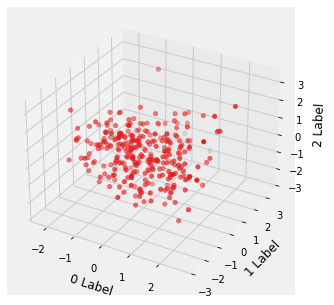

In [91]:
#%matplotlib notebook
plot3D(a, shift.labels_ )

In [90]:
%matplotlib inline

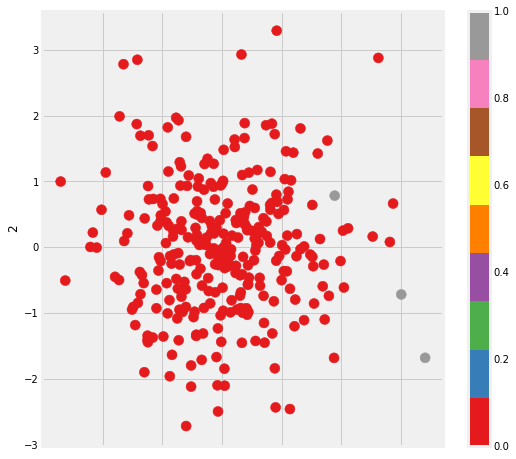

In [53]:
a.plot.scatter(x=1, y=2, c=shift.labels_, figsize=(8, 8), colormap='Set1', s=100);

# DBSCAN

In [54]:
from sklearn.cluster import DBSCAN

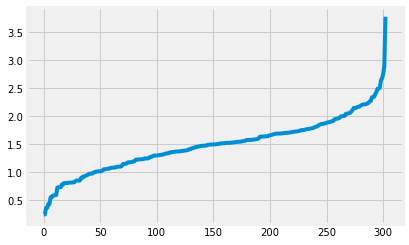

In [55]:
#obrisi
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_clear)
distances, indices = neighbors_fit.kneighbors(data_clear)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [56]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# A list holds the silhouette coefficients for each k
dbscan_silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    dbscan = DBSCAN(eps=1.749, min_samples=k)
    dbscan.fit(data_clear)
    db_score = silhouette_score(data_clear, dbscan.labels_)
    dbscan_silhouette_coefficients.append(db_score)

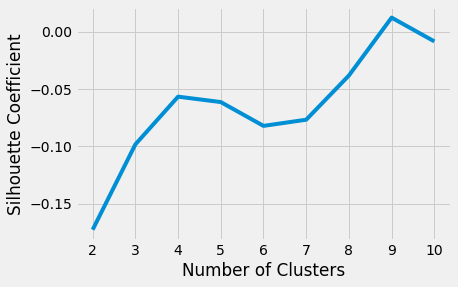

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), dbscan_silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [59]:
cluster = DBSCAN(n_jobs=-1, eps=1.749, min_samples=5)
scan = cluster.fit(data_clear)

In [60]:
print(pd.DataFrame(scan.labels_).value_counts(sort=False))
scan.labels_

-1    118
 0     60
 1    107
 2      7
 3      4
 4      7
dtype: int64


array([-1,  2,  0, -1, -1,  1, -1, -1,  0, -1,  0,  4,  0,  1, -1, -1, -1,
        1,  1,  1,  0, -1,  4, -1,  0,  1,  1, -1,  1, -1, -1,  1, -1,  0,
        1,  1, -1,  2,  3,  0,  0, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  0,  0,  1,  0, -1,  3, -1,  0,  1,  0,  0, -1, -1,
       -1, -1, -1,  0,  0,  1,  1, -1,  0,  1,  4,  2, -1,  0, -1, -1,  1,
        1,  1, -1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  0,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  0,  0, -1,  2,  0, -1, -1, -1, -1,  1, -1, -1,
        0,  1, -1,  0, -1, -1,  4, -1,  0,  1,  1,  0,  1, -1,  1,  1,  4,
       -1, -1, -1, -1,  1, -1,  1, -1,  0,  1,  2,  1,  1,  1, -1, -1, -1,
        2, -1,  0,  1,  1,  0, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1, -1,  0,  2,  1,  0, -1,  1,  0, -1,  1, -1,  1,  1, -1,
       -1, -1,  0,  1,  0,  0, -1, -1, -1, -1,  0,  1, -1,  1, -1, -1, -1,
        1,  0,  0,  0,  1, -1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  1, -1,
        1,  1,  0, -1,  1

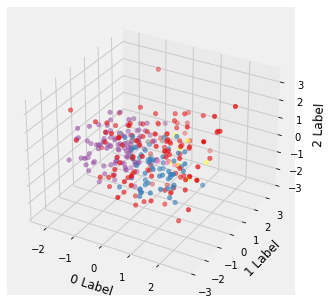

In [89]:
#%matplotlib notebook
plot3D(a, scan.labels_ )

In [88]:
%matplotlib inline

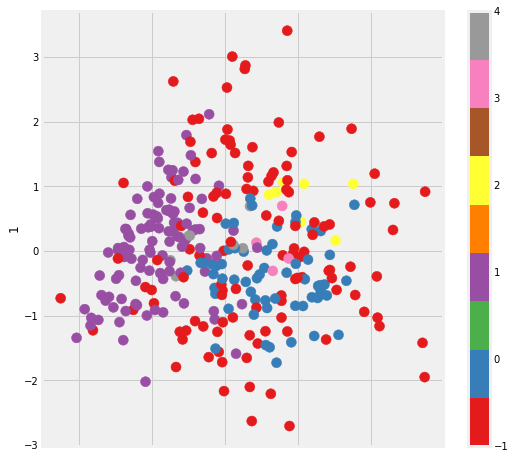

In [63]:
a.plot.scatter(x=0, y=1, c=scan.labels_, figsize=(8, 8), colormap='Set1', s=100);

In [64]:
data_clear

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,c_typical,c_atypical,c_nonang,c_asymp,r_STT,r_hyper
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,-2.274579,1,0,0,0,0,1
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,-0.649113,0,0,0,1,0,1
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,-0.649113,0,0,0,1,0,1
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,-2.274579,0,0,1,0,0,0
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.976352,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,-1.234430,0.334813,0,-0.770990,0,0.138373,-0.649113,1,0,0,0,0,0
299,1.502821,1,0.700612,-1.038723,1,-0.376896,0,2.036303,-0.649113,0,0,0,1,0,0
300,0.283813,1,-0.096170,-2.238149,0,-1.515388,1,0.138373,-0.649113,0,0,0,1,0,0
301,0.283813,0,-0.096170,-0.206864,0,1.068113,0,-0.896862,-0.649113,0,1,0,0,0,1


# Hierarchical Merging

In [65]:
from sklearn.cluster import AgglomerativeClustering

# A list holds the silhouette coefficients for each k
agglomerative_silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(data_clear)
    score = silhouette_score(data_clear, agglomerative.labels_)
    agglomerative_silhouette_coefficients.append(score)

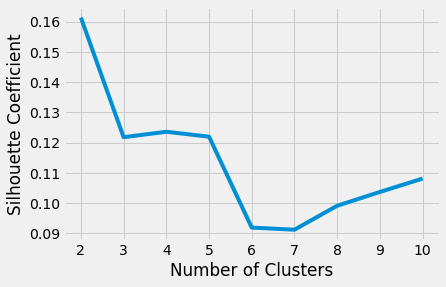

In [66]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), agglomerative_silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [67]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [68]:
cluster = AgglomerativeClustering(n_clusters=2) 
merge = cluster.fit(data_clear)

In [69]:
print(pd.DataFrame(merge.labels_).value_counts(sort=False))
merge.labels_

0    171
1    132
dtype: int64


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [70]:
data.iloc[(data["slope"]==1).to_numpy()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
4,41,0,2,130,204,0,2,172,0,1.4,1
5,56,1,2,120,236,0,0,178,0,0.8,1
7,57,0,4,120,354,0,0,163,1,0.6,1
13,44,1,2,120,263,0,0,173,0,0.0,1
14,52,1,3,172,199,1,0,162,0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
288,56,1,2,130,221,0,2,163,0,0.0,1
291,55,0,2,132,342,0,0,166,0,1.2,1
293,63,1,4,140,187,0,2,144,1,4.0,1
295,41,1,2,120,157,0,0,182,0,0.0,1


In [71]:
data.iloc[merge.labels_==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,-1
1,67,1,4,160,286,0,2,108,1,1.5,0
2,67,1,4,120,229,0,2,129,1,2.6,0
3,37,1,3,130,250,0,0,187,0,3.5,-1
6,62,0,4,140,268,0,2,160,0,3.6,-1
...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,0
298,45,1,1,110,264,0,0,132,0,1.2,0
299,68,1,4,144,193,1,0,141,0,3.4,0
300,57,1,4,130,131,0,0,115,1,1.2,0


In [72]:
data.iloc[merge.labels_==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,56.116959,0.713450,3.286550,134.046784,240.877193,0.152047,1.146199,138.941520,0.456140,1.532749,-0.035088
std,8.223947,0.453477,0.979072,18.997155,43.660483,0.360121,0.980231,22.845957,0.499535,1.229148,0.458831
min,35.000000,0.000000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,-1.000000
25%,51.000000,0.000000,3.000000,120.000000,211.500000,0.000000,0.000000,123.500000,0.000000,0.600000,0.000000
50%,57.000000,1.000000,4.000000,130.000000,240.000000,0.000000,2.000000,142.000000,0.000000,1.400000,0.000000
75%,62.000000,1.000000,4.000000,144.000000,272.000000,0.000000,2.000000,154.000000,1.000000,2.300000,0.000000
max,76.000000,1.000000,4.000000,200.000000,353.000000,1.000000,2.000000,195.000000,1.000000,6.200000,1.000000


In [73]:
data.iloc[(merge.labels_==0) & (data["slope"]==1).to_numpy()].shape

(15, 11)

In [74]:
data.iloc[merge.labels_==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,52.265152,0.636364,2.992424,128.636364,254.227273,0.143939,0.787879,163.424242,0.159091,0.400758,0.962121
std,9.598712,0.482878,0.912142,15.136162,60.043189,0.352366,0.980966,13.715830,0.367154,0.646954,0.191630
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,156.000000,0.000000,0.000000,1.000000
50%,52.000000,1.000000,3.000000,130.000000,245.000000,0.000000,0.000000,163.000000,0.000000,0.000000,1.000000
75%,59.000000,1.000000,4.000000,140.000000,288.500000,0.000000,2.000000,172.250000,0.000000,0.800000,1.000000
max,77.000000,1.000000,4.000000,172.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,1.000000


In [75]:
data.iloc[merge.labels_==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
4,41,0,2,130,204,0,2,172,0,1.4,1
5,56,1,2,120,236,0,0,178,0,0.8,1
7,57,0,4,120,354,0,0,163,1,0.6,1
13,44,1,2,120,263,0,0,173,0,0.0,1
14,52,1,3,172,199,1,0,162,0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
284,61,1,4,148,203,0,0,161,0,0.0,1
288,56,1,2,130,221,0,2,163,0,0.0,1
291,55,0,2,132,342,0,0,166,0,1.2,1
295,41,1,2,120,157,0,0,182,0,0.0,1


In [76]:
data.iloc[(merge.labels_==1) & (data["slope"]!=1).to_numpy()].shape

(5, 11)

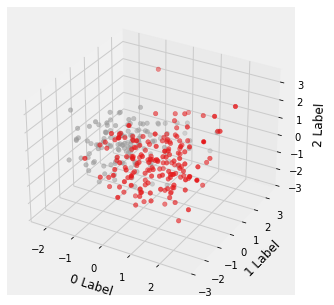

In [86]:
#%matplotlib notebook
plot3D(a, merge.labels_ )

In [85]:
%matplotlib inline

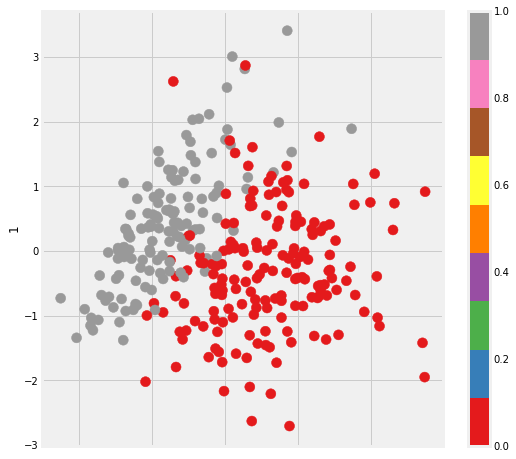

In [79]:
a.plot.scatter(x=0, y=1, c=merge.labels_, figsize=(8, 8), colormap='Set1', s=100);

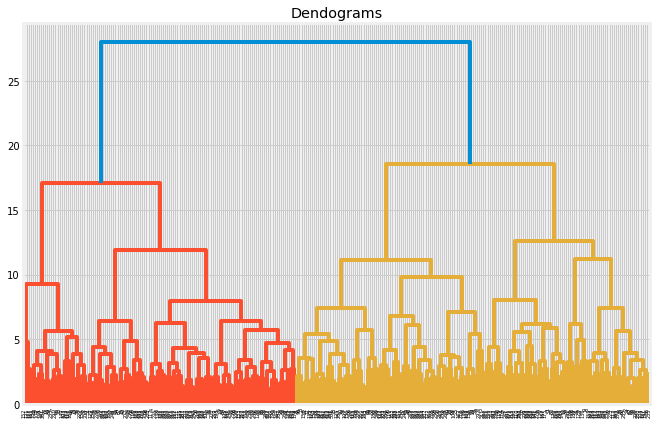

In [80]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_clear, method='ward'))